In [75]:
import pandas as pd
import datetime

1. Introduction
2. Data Description:
    1. Twitter Data
        1. Columns we will be using
        2. Limitations of the data
    2. Covid Global data
        1. Columns we will be using
        2. Limitations of the data
    3. Ethical Consideration
3. Data Preperation, Cleaning and Manipulation:
4. Exploratory Data Analysis (EDA):
    1. Tweeter
    2. COCID-19
5. Sentiment Analysis:
6. Correlation Analysis:

## 1. Introduction

As the pandemic has impacted the globe for 3 years and continued to reach repetitive peaks in different regions, epidemics and corresponding preventive measures have become the center of discussion and concerns to modern society. While previously it was much difficult to collect adequate reactions to vaccines across different communities at one place, twitter allows us to access expressed sentiments from a variety of communities.


With that comes various opinions about the vaccine, and many choose to be vocal about their ideas on social media. We wondered whether looking at social media would help us understand what different communities across the world thought of the Vaccine, and whether such opinions are teetered by their socio-political climates and geographical locations.

To do this, we turned to Twitter and scraped tweets containing hastags related to the vaccine. We then took these datapoints and quantified their approval ratings by calcuatinng sentiment score for each text. We then expressed this information in the form of graphs and maps. Currently, we have 5000 datapoints, and over 2000 datapoints with geographical coordinates.

We hope that by reviewing these charts and maps, we can better understand the concerns different communitites have over the vaccine, and what may be contributing factors to this.

The proposed project is to analyze tweets about the Pfizer-BioNTech vaccine in order to understand how sentiment varies by country, over time, and by demographic factors. The project also aims to study the correlation between sentiment and the number of confirmed cases, deaths, and active cases, and to compare the sentiment of tweets about the Pfizer-BioNTech vaccine to the sentiment of tweets about other COVID-19 vaccines. The goal is to gain insights on how people perceive and discuss the Pfizer-BioNTech vaccine on social media in different countries, how it changes over time and how it is influenced by various demographic factors. This information can be useful for researchers, healthcare professionals, and policymakers, to understand public opinion and to develop strategies to improve vaccine uptake.

## 2. Data Description

### 2.1 Twitter Data

Our primary dataset is The Pfizer and BioNTech Vaccine Tweets Dataset posted on Kaggle and created by Gabriel Preda, who is a data scientist in Romania. 

Key features: Select 'user_location' 'text', 'hashtags' to extract useful information we want: locations for geo analysis, and their original tweets about the vaccines for text processing and sentiment analysis
Estimated size: 4.54 MB
Location: https://www.kaggle.com/gpreda/pfizer-vaccine-tweets
Format: CSV file
Access Method: through download or Kaggle API
COLLECTION METHODOLOGY:
Use tweepy to collect tweets about Pfizer & BioNTech (using #PfizerBioNTech hashtag)

### 2.2 COVID-19 Global

Our secondary dataset is the Covid-19 Global Dataset. The creator of the data set is an artificial intelligence engineer from Lebanon. 

Key features: useful columns to include are ‘total_confirmed’, ‘total_deaths’, ‘active_cases’, ‘, country’ to reflect the up-to-date numbers of daily confirmed, death and active cases for 218 countries
Estimated size:20.38 kB (but with multiple versions)
Location: https://www.kaggle.com/josephassaker/covid19-global-dataset?select=worldometer_coronavirus_summary_data.csv
Format: CSV file
Access Method: through download or Kaggle API


### 2.3 Ethical Concerns and bias

User privacy protection,
removed unique identifiers.

Limitations of the data

## 3. Data Preperation, Cleaning and Manipulation

In [76]:
# load the datasets:
tweet_df = pd.read_csv("data/vaccination_tweets.csv")
covid_df = pd.read_csv("data/worldometer_coronavirus_daily_data.csv")

In [77]:
tweet_df.sample(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
4840,1355007490425929729,#RustyolTrusty 😷💙🌊♻️🌳💚🐋🐬🐾💞🌸🌻🐝🦔🍀🎼🖼,Gaia,🇸🇬🇺🇸| Our paths may cross | #Peace Lived 4 #Co...,2010-03-28 09:12:19,9091,9537,47808,False,2021-01-29 04:18:55,@business 113K received #PfizerBioNTech vaccin...,['PfizerBioNTech'],Twitter for iPhone,1,0,False
5902,1363240104597282819,jaymylee colyer,"Wales, United Kingdom",regional director for LD/ASD/MH. passionate ab...,2018-05-11 14:10:47,129,346,1757,False,2021-02-20 21:32:23,All done x 2 #VaccinationCovid #PfizerBioNTec...,"['VaccinationCovid', 'PfizerBioNTech', 'letsge...",Twitter for Android,0,8,False
1668,1343650463221219328,Fat Cat,Belgique,50 Shades of Compliance.,2011-04-04 13:06:53,397,391,73,False,2020-12-28 20:10:08,#PfizerBioNTech The Germans made a huge mistak...,['PfizerBioNTech'],Twitter for iPad,0,0,False
10889,1455701431625797635,New Straits Times,Malaysia,"News, views and up-to-date reports from Malays...",2009-07-09 09:04:01,767808,431,1082,True,2021-11-03 01:00:41,#NSTworld The United States can now start givi...,"['NSTworld', 'PfizerBioNtech', 'Covid19', 'vac...",TweetDeck,2,0,False
534,1339307550701879296,The Frontiers Of,Earth,Uncovering our true potential daily...,2017-10-22 21:28:07,62,157,279,False,2020-12-16 20:32:57,Alaskan Healthcare Worker Suffers Severe Aller...,"['PfizerCOVIDvaccine', 'PfizerBioNTech']",Twitter Web App,3,5,False


In [78]:
# check for shape and missing values of the tweeter dataset
print(tweet_df.shape)
print(tweet_df.isna().sum())

(11020, 16)
id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [79]:
covid_df.sample(5)

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
75887,2021-4-13,Hungary,728078.0,2837.0,272974.0,23980.0,272.0
104933,2022-3-25,Martinique,141415.0,0.0,140402.0,909.0,0.0
66206,2021-9-19,Gibraltar,5477.0,1.0,77.0,97.0,0.0
88678,2020-5-19,Kuwait,16764.0,1073.0,11962.0,121.0,3.0
139597,2022-2-14,Saint Lucia,22121.0,73.0,1549.0,347.0,0.0


In [80]:
# check for shape and missing values of the covid-19 stats dataset
print(covid_df.shape)
print(covid_df.isna().sum())

(184787, 7)
date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64


In [81]:
# subseting the tweeter data
tweet_df = tweet_df[[ 'user_name','user_location', 'user_created', 'date', 'text', 'hashtags', 'retweets', 'favorites']]
# encode user_name using to integers according to ethical concerns 7202 unique usernames detected
tweet_df['user_name'] = tweet_df['user_name'].factorize()[0]
# change the format
tweet_df['date'] = pd.to_datetime(tweet_df['date'], errors = 'coerce').dt.date
tweet_df['user_created'] = pd.to_datetime(tweet_df['user_created'], errors = 'coerce').dt.date

In [82]:
covid_df['date'] = pd.to_datetime(covid_df['date'], errors = 'coerce').dt.date

### 3.1 Adding Counrty and City for joining.

In [83]:
# first, we try to get the city if possible
#!pip install geotext
from geotext import GeoText
# we will need the another tool to interact with Geotext
from collections import OrderedDict
def get_city(loc_txt):
    try:
        return GeoText(loc_txt).cities[0]
    except:
        pass
    return None

def get_counrty(loc_txt):
    try:
        return list(GeoText(loc_txt).country_mentions.keys())[0]
    except:
        pass
    
    return None
        
tweet_df['city'] = tweet_df['user_location'].apply(get_city)
tweet_df['country'] = tweet_df['user_location'].apply(get_counrty)

In [84]:
tweet_df.sample(5)

,user_name,user_location,user_created,date,text,hashtags,retweets,favorites,city,country
1583,1082,"Saint Louis, MO, USA",2008-07-18,2020-12-26,Now my turn to return the favor: spending the ...,NaN,3,149,None,None
10920,7151,"Florida, USA",2016-09-26,2021-11-08,NEW VIDEO - Pfizer-BioNTech vaccine now author...,"['covid19', 'vaccines', 'pfizerbiontech']",0,0,Florida,UY
4936,3320,NaN,2020-05-10,2021-01-29,Quite confused about vaccine rollout how does ...,['PfizerBioNTech'],0,0,None,None
7490,9,Islamabad,2012-11-12,2021-03-31,#Covid_19 \n\n#PfizerBioNTech says its #COVID1...,"['Covid_19', 'PfizerBioNTech', 'COVID19Vaccine...",0,0,Islamabad,PK
5843,3874,Boston,2011-05-18,2021-02-19,The #COVID19 #vaccine developed by #PfizerBioN...,"['COVID19', 'vaccine', 'PfizerBioNTech', 'immu...",0,0,Boston,US


In [85]:
# second we get the country
# !pip install pycountry
import pycountry

def fill_country(loc_txt, country):
    if country!=None:
        return country
    candicates = []
    candicates = [country.name for country in pycountry.countries if country.name in str(loc_txt)]
    if candicates:
        return candicates[0]
    candicates = [country.alpha_2 for country in pycountry.countries if country.alpha_2 in str(loc_txt)]
    if candicates:
        return candicates[0]
    candicates = [country.alpha_3 for country in pycountry.countries if country.alpha_3 in str(loc_txt)]
    if candicates:
        return candicates[0]
    return None

tweet_df['country'] = tweet_df[['user_location','country']].apply(lambda x:fill_country(x['user_location'],x['country']),axis=1)

In [86]:
# %%time
# this may take about 5 mins
# !pip install country_converter
# convert country names to standard format
import country_converter as coco
tweet_df['country'] = tweet_df['country'].apply(lambda x: str(x))
tweet_df['country'] = coco.convert(names=tweet_df['country'].to_list(), to='name_short')
tweet_df['country'] = tweet_df['country'].apply(lambda x: None if x=="not found" else x)
# there is nothing we can do about the error 

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found in regex
None not found i

In [87]:
tweet_df.sample(5)

,user_name,user_location,user_created,date,text,hashtags,retweets,favorites,city,country
3893,2665,"Ann Arbor, MI",2013-05-02,2021-01-17,Grateful that my elderly parents (overseas) go...,"['PfizerBioNTech', 'vaccine']",0,6,Ann Arbor,United States
6306,1751,"Northern California, USA",2015-08-15,2021-02-28,@TheoFleury14 Do NOT Get JABBED Until You See ...,NaN,3,0,None,Saudi Arabia
1023,717,Bosna i Hercegovina,2012-05-11,2020-12-20,Doctors Nura and Emir Festić: Those who do not...,"['COVID19', 'CovidVaccine']",0,3,None,None
1600,1049,Dublin,2020-03-25,2020-12-26,The rollout of the Pfizer-BioNTech Covid-19 ac...,NaN,0,0,Dublin,United States
5467,3668,Miami,2016-03-04,2021-02-12,💉#PfizerBiontech \n\nPhase III #COVID19 Vaccin...,"['PfizerBiontech', 'COVID19', 'Vaccine', 'vacc...",0,1,Miami,United States


In [88]:
tweet_df.isna().sum()

user_name           0
user_location    2270
user_created        0
date                0
text                0
hashtags         2582
retweets            0
favorites           0
city             6701
country          4417
dtype: int64

### 3.2 Text Cleaning and sentiment evaluation
Besides the spacial relationship, we are also interested in the content that users posted. To measure users' approval of the COVID-19 vaccine, we will approach with the sentiment score of the texts.

The nltk library we will be using returns measures of postivity, negativity, neutrality, and a compound sentiment score of the text. The higher the compound sentiment score, the greater the approval.

We will need to import the NLTK library and download some dictionaries to run certain methods.

In [89]:
import re

# make all text lowercase
tweet_df['clean_text'] = tweet_df.text.apply(lambda x: x.lower())

#Remove twitter handlers
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# removing short words
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [90]:
import nltk
# downlaod some resouces
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# load the sentiment function
sia = SentimentIntensityAnalyzer()
# load the stemmer function 
porter = nltk.PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JYM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [91]:
# romve stop-wards
stop_words = stopwords.words('english')

# tokenization
tokenized_tweet = tweet_df['clean_text'].apply(lambda x: x.split())

# remove stop-words
tokenized_tweet = tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])

# similar to stop words, we create a list of words we don't want
unwanted_words = ['covid','vaccine']
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if w not in unwanted_words])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('http')!=-1)])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('vac')!=-1)])
tokenized_tweet = tokenized_tweet.apply(lambda x: [w for w in x if not(w.find('covid')!=-1)])

# de-tokenization
detokenized_tweet = []
for i in range(len(tweet_df)):
    t = ' '.join(tokenized_tweet[i])
    detokenized_tweet.append(t)
tweet_df['tweet_words'] = tokenized_tweet 
tweet_df['clean_text'] = detokenized_tweet

In [92]:
tweet_df[['text','tweet_words','clean_text']].sample(5)

,text,tweet_words,clean_text
7581,Antibody levels of some health workers who wer...,"[antibody, levels, health, workers, inoculated...",antibody levels health workers inoculated drop...
3225,A triumph for science and collaboration! #Pfiz...,"[triumph, science, collaboration]",triumph science collaboration
1082,@MittRomney What are you talking about? We hav...,"[talking, viable, memo]",talking viable memo
4712,@bbclaurak The #EU has not yet understood how ...,"[understood, much, hate, really, stay, clear]",understood much hate really stay clear
8012,Thank you science. Thank you @MeckCounty Publi...,"[thank, science, thank, public, health, shotm,...",thank science thank public health shotm fully


In [93]:
# Now we will calculate the sentiment score for each tweet.

tweet_df['compound_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['compound'])
tweet_df['neg_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['neg'])
tweet_df['pos_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['pos'])
tweet_df['neu_sentiment'] = tweet_df['clean_text'].apply(lambda x:sia.polarity_scores(x)['neu'])

In [94]:
tweet_df.sample(5)

,user_name,user_location,user_created,date,text,hashtags,retweets,favorites,city,country,clean_text,tweet_words,compound_sentiment,neg_sentiment,pos_sentiment,neu_sentiment
7124,4719,"Doha, Qatar",2014-03-15,2021-03-20,Covid 19 -Vaccine 2nd Dose #pfizerbiontech #lu...,"['pfizerbiontech', 'lusailcity', 'drivethru', ...",0,3,Doha,Qatar,dose,[dose],0.0000,0.000,0.000,1.000
8553,2467,Trinidad & Tobago,2008-02-04,2021-05-27,Cue the conspiracy theorists &amp; anti vaxxer...,"['PfizerBioNTech', 'vaccine']",1,0,Trinidad,Uruguay,conspiracy theorists anti vaxxers first willia...,"[conspiracy, theorists, anti, vaxxers, first, ...",-0.6908,0.533,0.000,0.467
10661,7014,Philippines,2018-02-24,2021-10-08,Half Vaccinated 💉🩸 #PfizerBioNTech https://t.c...,['PfizerBioNTech'],0,0,None,Philippines,half,[half],0.0000,0.000,0.000,1.000
3188,2160,"England, United Kingdom",2020-11-01,2021-01-11,"Honestly, the number of times ‘get the jab int...",NaN,0,2,None,United Kingdom,honestly number times arms repeated last weeks...,"[honestly, number, times, arms, repeated, last...",0.5106,0.000,0.417,0.583
9367,1442,"Boston, MA",2017-09-07,2021-07-26,Multi-center study with data showing the safet...,"['PfizerBiontech', 'Moderna', 'COVID19vaccines']",26,56,Boston,United States,multi center study data showing safety second ...,"[multi, center, study, data, showing, safety, ...",0.4215,0.000,0.259,0.741


C:\Users\JYM\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JYM\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JYM\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\JYM\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated i

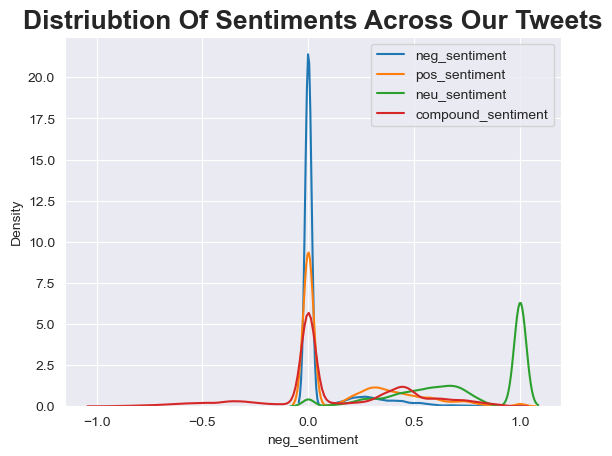

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(tweet_df['neg_sentiment'],bw=0.1, label = 'neg_sentiment')
sns.kdeplot(tweet_df['pos_sentiment'],bw=0.1, label = 'pos_sentiment')
sns.kdeplot(tweet_df['neu_sentiment'],bw=0.1, label = 'neu_sentiment')
sns.kdeplot(tweet_df['compound_sentiment'],bw=0.1, label = 'compound_sentiment')
plt.legend(loc='upper right')
plt.show()

In [96]:
merged_df = tweet_df.merge(covid_df, on=['country', 'date'], how='left')
merged_df['date'] = pd.to_datetime(merged_df['date'], errors = 'coerce')
merged_df['user_created'] = pd.to_datetime(merged_df['user_created'], errors = 'coerce')
display(merged_df.sample(5))
merged_df.isna().sum()

,user_name,user_location,user_created,date,text,hashtags,retweets,favorites,city,country,...,tweet_words,compound_sentiment,neg_sentiment,pos_sentiment,neu_sentiment,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
7193,2614,Glasgow environs.,2010-12-28,2021-03-24,@simonmayo Excellent news! Please continue to ...,NaN,0,0,Glasgow,United Kingdom,...,"[excellent, news, please, continue, take, care...",0.7184,0.0,0.429,0.571,NaN,NaN,NaN,NaN,NaN
10292,6787,Somewhere over the rainbow,2009-07-08,2021-08-26,What I said. 👇🏻 #natuurlijkimmuun #SARSCoV2 #i...,"['natuurlijkimmuun', 'SARSCoV2', 'immuniteit',...",0,0,None,None,...,[whatsaid],0.0000,0.0,0.000,1.000,NaN,NaN,NaN,NaN,NaN
5518,1753,Manchester,2011-07-01,2021-02-13,The check-in team at @CheetCrumpINT doing a gr...,['PfizerBiontech'],8,33,Manchester,United States,...,"[check, team, doinggreat]",0.0000,0.0,0.000,1.000,NaN,NaN,NaN,NaN,NaN
8414,3567,NaN,2014-07-15,2021-05-30,Spanish study finds AstraZeneca vaccine follow...,['coronavirus'],0,4,None,None,...,"[spanish, study, finds, astrazeneca, followed,...",0.7184,0.0,0.429,0.571,NaN,NaN,NaN,NaN,NaN
2212,936,"Dubai, UAE",2009-10-13,2021-01-03,The Dubai Health Authority has revealed a list...,NaN,0,0,Dubai,United Arab Emirates,...,"[dubai, health, authority, revealedlist, diffe...",0.0772,0.0,0.126,0.874,213231.0,1590.0,22843.0,679.0,5.0


user_name                     0
user_location              2270
user_created                  0
date                          0
text                          0
hashtags                   2582
retweets                      0
favorites                     0
city                       6701
country                    4417
clean_text                    0
tweet_words                   0
compound_sentiment            0
neg_sentiment                 0
pos_sentiment                 0
neu_sentiment                 0
cumulative_total_cases     7147
daily_new_cases            7147
active_cases               7255
cumulative_total_deaths    7147
daily_new_deaths           7162
dtype: int64

## 4. Exploratory Data Analysis (EDA)


#### 4.1 User Demographics
Created Time
    Followers
    Frequency by City and Country
#### 4.2 Sentiment Score Over time
#### 4.3 Sentiment Score VS Location
#### 4.4 

<Figure size 1600x800 with 0 Axes>

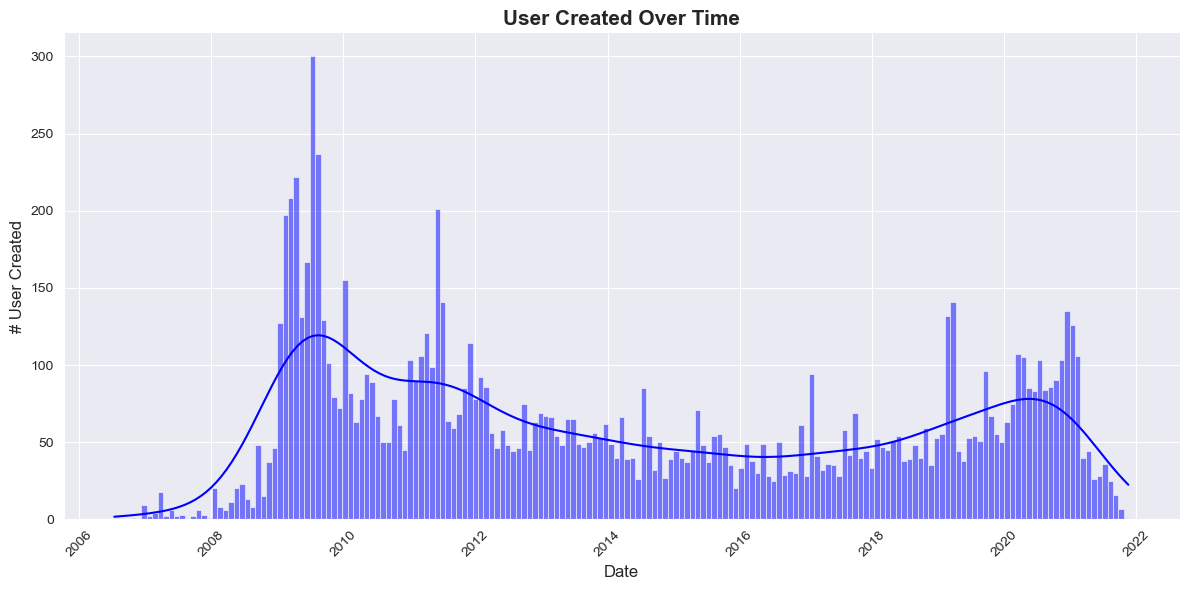

In [97]:
plt.figure(figsize=(16,8))
sns.displot(merged_df, x="user_created", kde=True, color='blue',height=6, aspect=2,binwidth=30)
plt.xlabel('Date', fontsize=12)
plt.ylabel('# User Created', fontsize=12)
plt.title('User Created Over Time', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

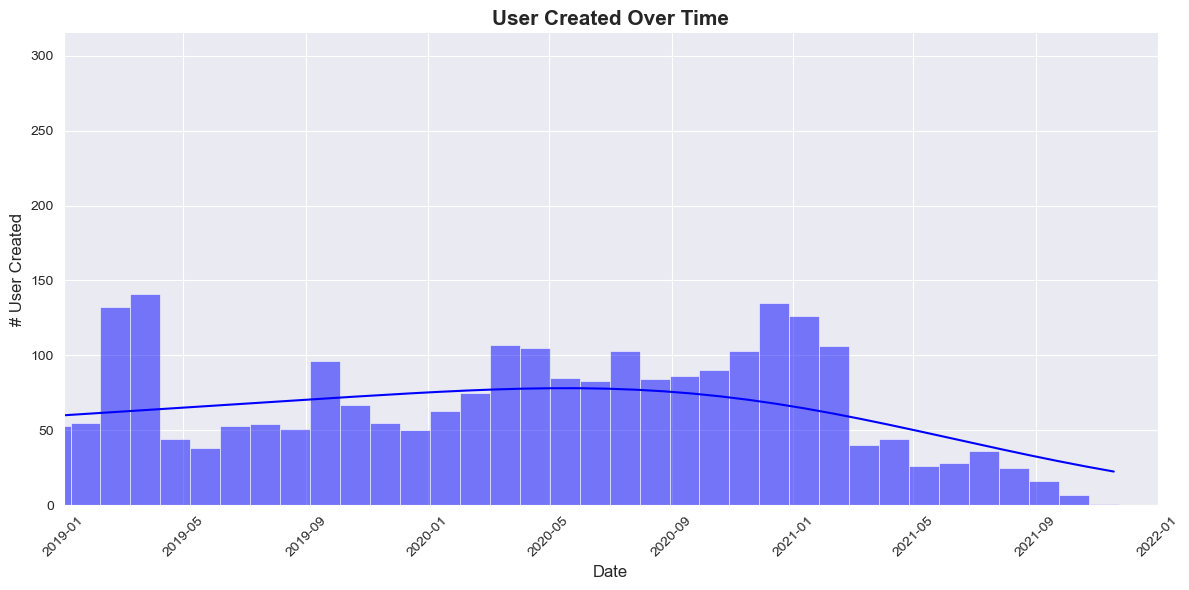

In [98]:
plt.figure(figsize=(16,8))
sns.displot(merged_df, x="user_created", kde=True, color='blue',height=6, aspect=2, binwidth=30)
plt.xlabel('Date', fontsize=12)
plt.xlim([datetime.date(2019, 1, 1), datetime.date(2022, 1, 1)])
plt.ylabel('# User Created', fontsize=12)
plt.title('User Created Over Time', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

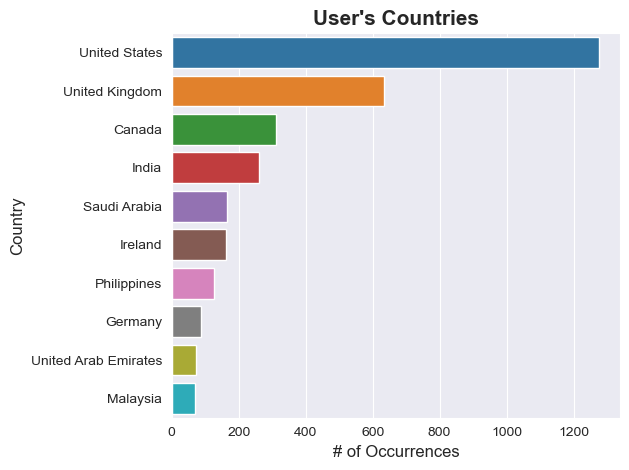

In [113]:
# Lets see the user demographics
user_country = merged_df[['user_name', 'country']].value_counts().reset_index()
top_10_countries =  user_country['country'].value_counts(sort=False).nlargest(10)

sns.countplot(y=user_country['country'], order=top_10_countries.index, orient='h')
plt.xlabel('# of Occurrences', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("User's Countries", fontsize=15, fontweight='bold')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

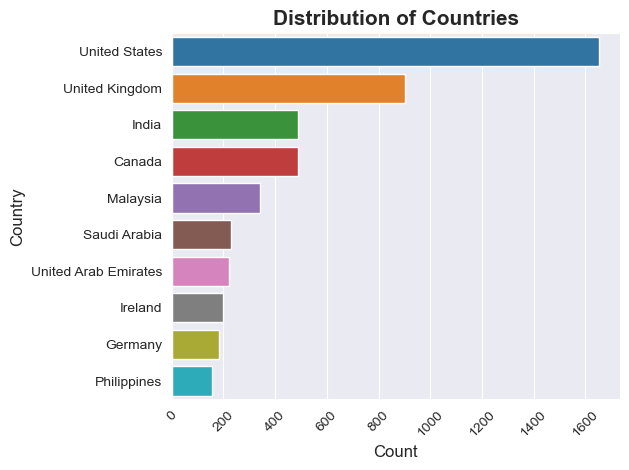

In [99]:
# Lets see the user demographics
top_10_countries =  merged_df['country'].value_counts(sort=False).nlargest(10)
sns.countplot(y=merged_df['country'], order=top_10_countries.index, orient='h')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Distribution of Countries', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

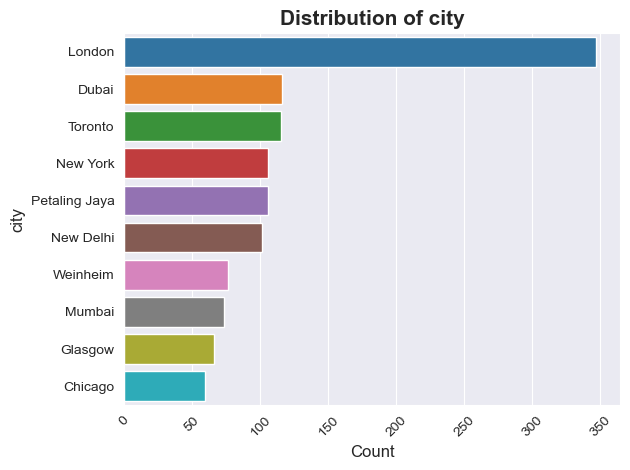

In [100]:
top_10_cities =  merged_df['city'].value_counts(sort=False).nlargest(10)
sns.countplot(y=merged_df['city'], order=top_10_cities.index, orient='h')
plt.xlabel('Count', fontsize=12)
plt.ylabel('city', fontsize=12)
plt.title('Distribution of city', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

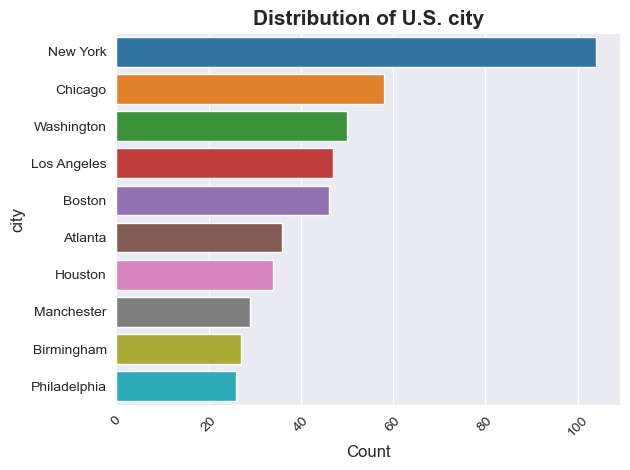

In [101]:
top_10_cities =  merged_df[merged_df.country=='United States']['city'].value_counts(sort=False).nlargest(10)
sns.countplot(y=merged_df[merged_df.country=='United States']['city'], order=top_10_cities.index, orient='h')
plt.xlabel('Count', fontsize=12)
plt.ylabel('city', fontsize=12)
plt.title('Distribution of U.S. city', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1600x2000 with 0 Axes>

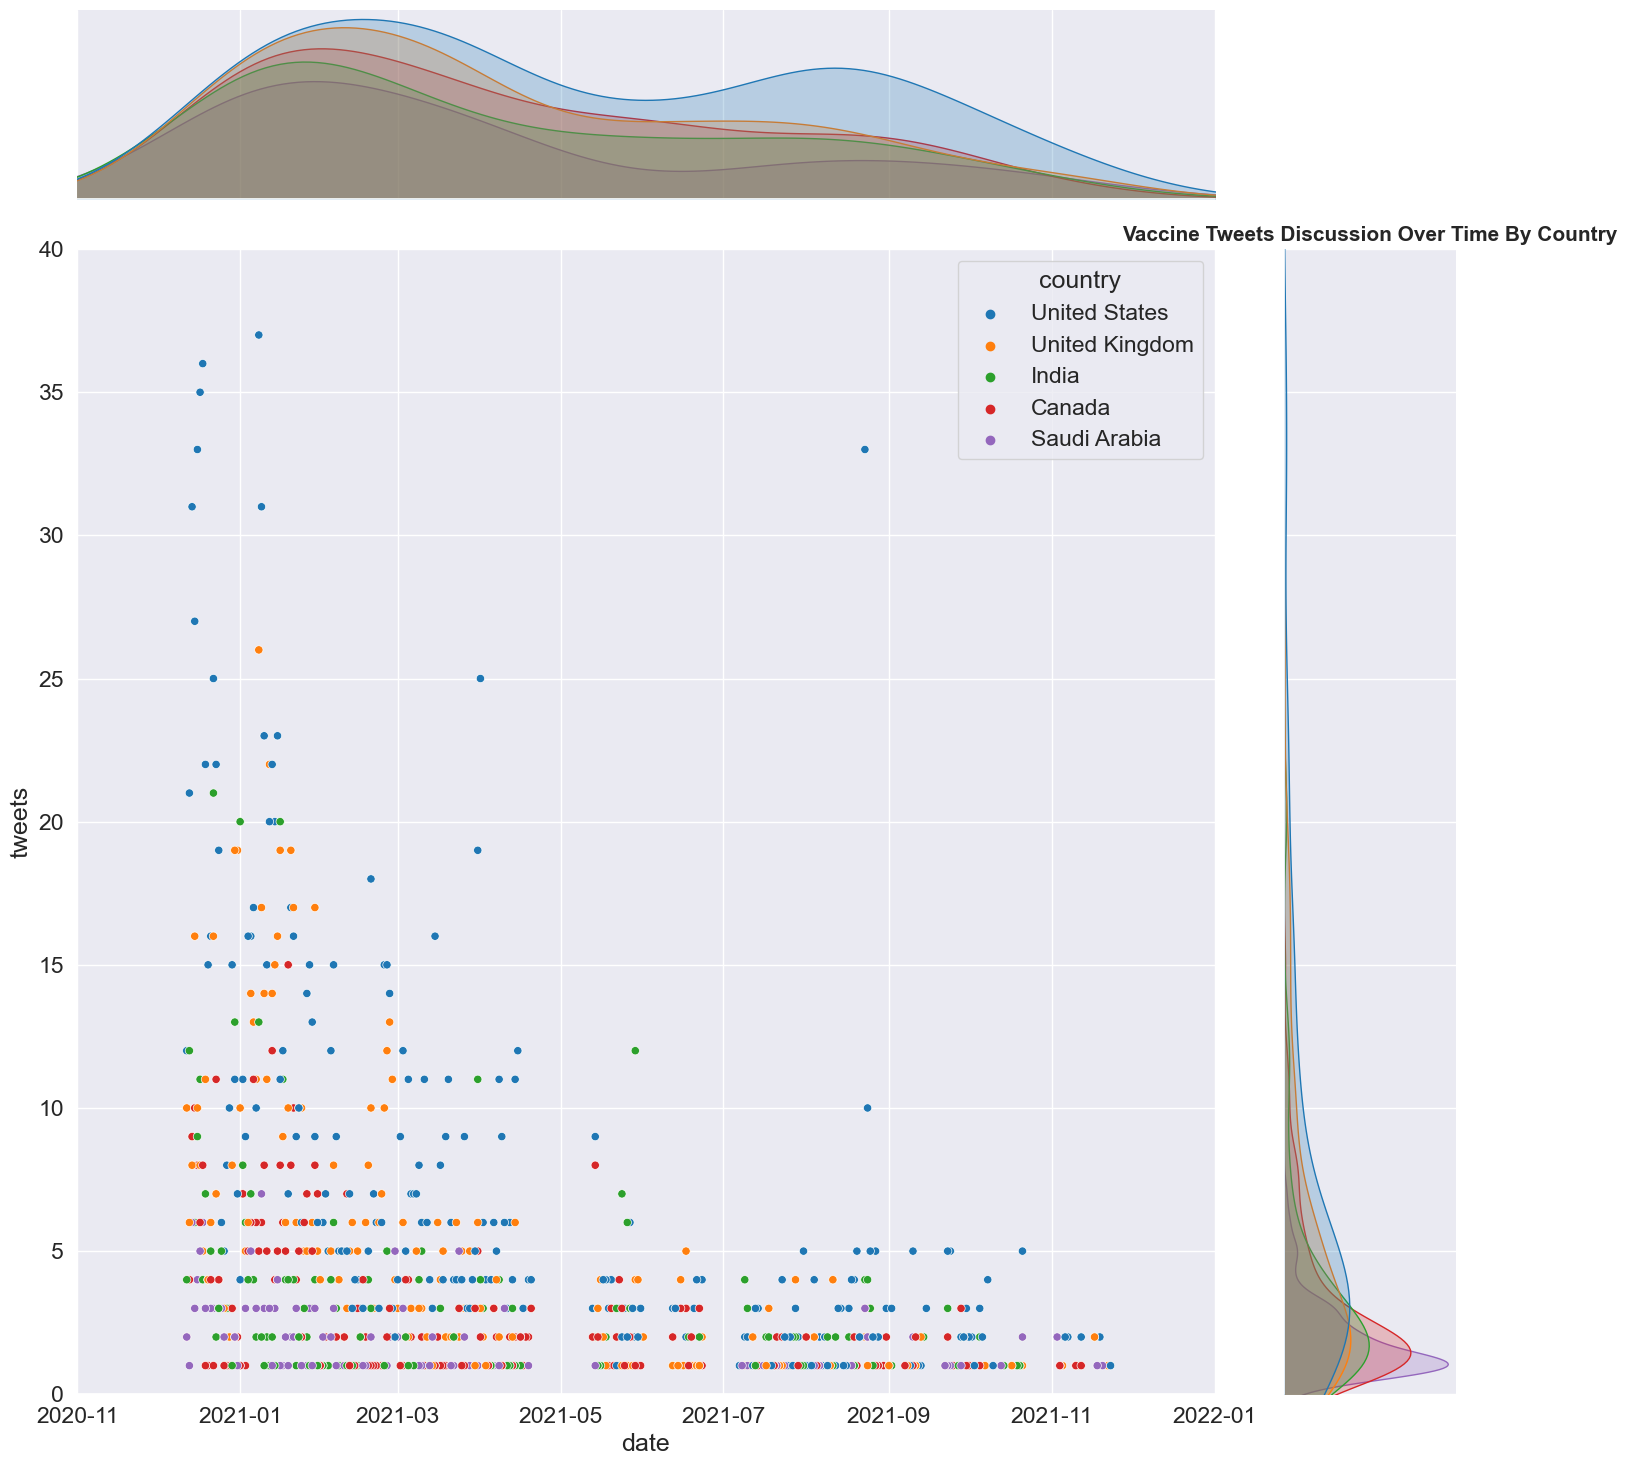

In [192]:
# Lets see the user demographics
tweet_country = merged_df[['date', 'country']].value_counts().reset_index(name='tweets')
top_5_countries =  user_country['country'].value_counts(sort=False).nlargest(5)
tweet_country = tweet_country[tweet_country['country'].isin(top_5_countries.index)]

# Make the joint plot
plt.figure(figsize=(16, 20))

sns.jointplot(x='date', y='tweets', data=tweet_country, 
              hue='country', height=15, 
              xlim = (datetime.date(2020, 11, 1), datetime.date(2022, 1, 1)), ylim=(0,40))

plt.xlabel('Date', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Vaccine Tweets Discussion Over Time By Country', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# two time point where things are interesting: 2021-2 and 2021-09
# also why missing data and its impact on the curve

In [ ]:
tweet_country = merged_df[['date', 'country']].value_counts().reset_index(name='tweets')
top_5_countries =  user_country['country'].value_counts(sort=False).nlargest(5)
tweet_country = tweet_country[tweet_country['country'].isin(top_5_countries.index)]

In [102]:
# popular tweets

In [103]:
from pandas.tseries.offsets import MonthEnd
df = merged_df.copy()
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
# df["month_end_date"] = df['date'].dt.date + MonthEnd(0)

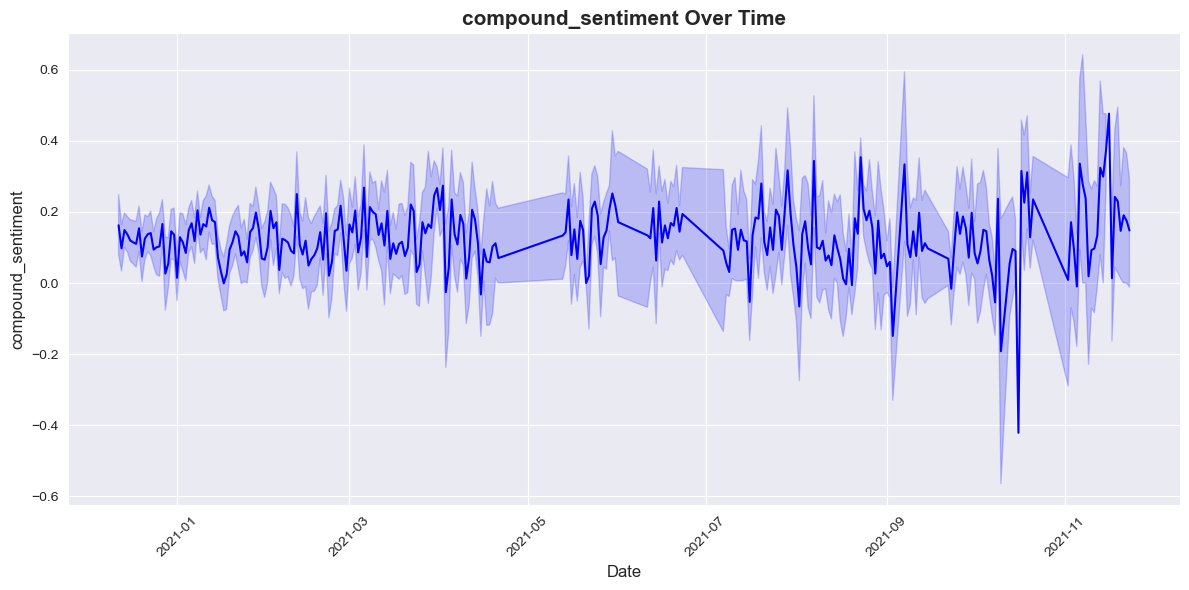

In [104]:
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='compound_sentiment', data=df, color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('compound_sentiment', fontsize=12)
plt.title('compound_sentiment Over Time', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

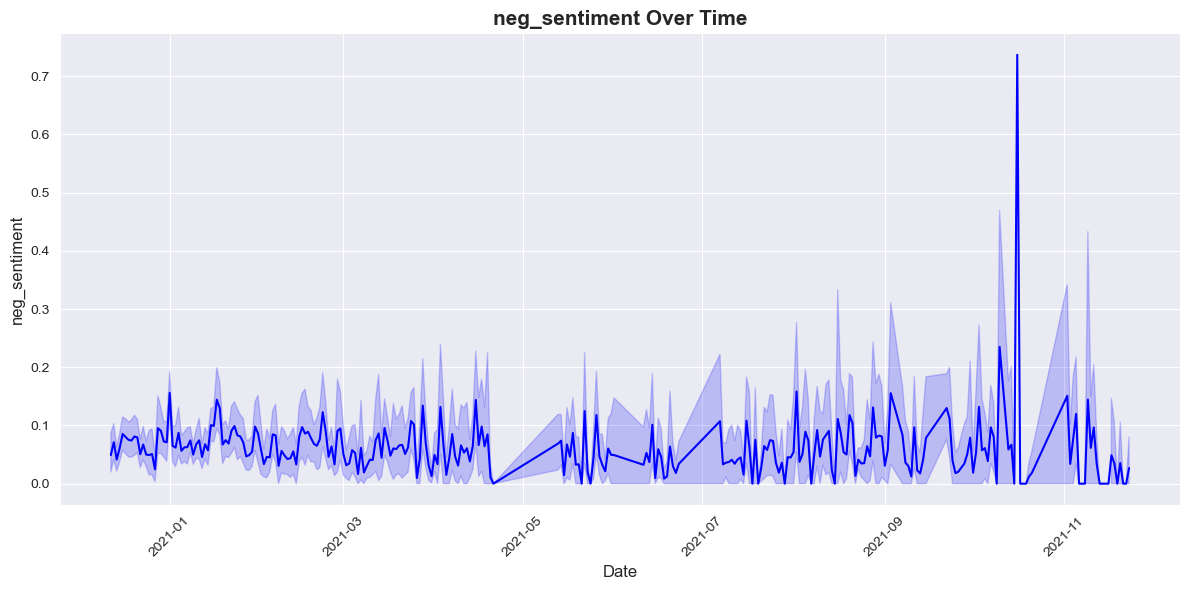

In [105]:
# df = df.groupby(['date']).mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='neg_sentiment', data=df, color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('neg_sentiment', fontsize=12)
plt.title('neg_sentiment Over Time', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

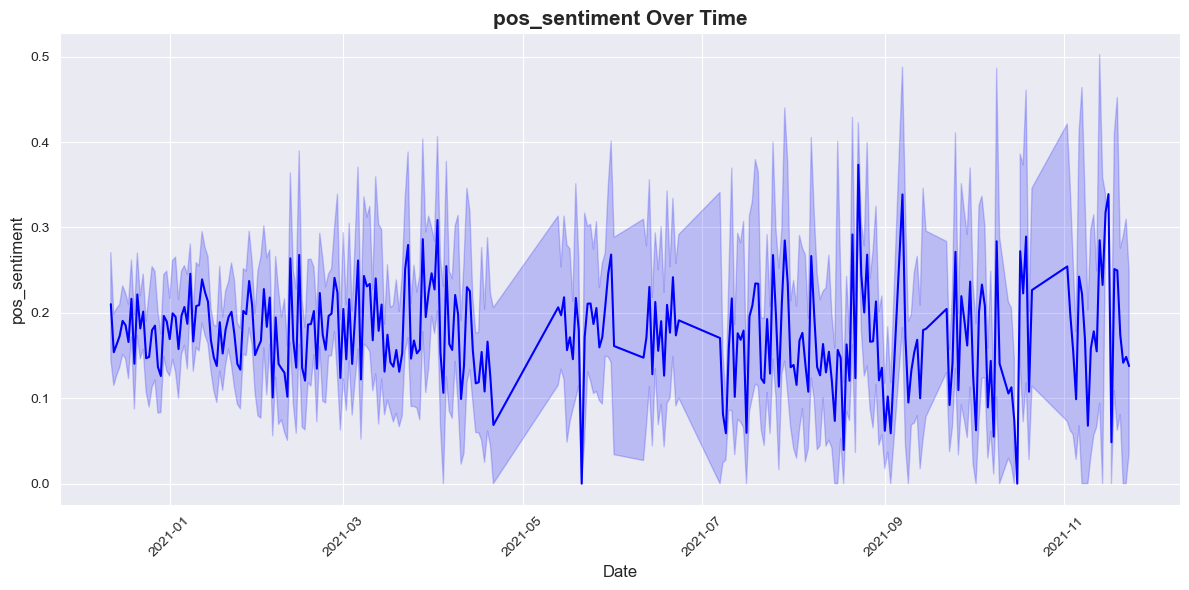

In [106]:
# df = df.groupby(['date']).mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='pos_sentiment', data=df, color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('pos_sentiment', fontsize=12)
plt.title('pos_sentiment Over Time', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [194]:
# for compound snetiment score, the trend started to gain more volatility after 2021-07
# we can also observe this in the negaive sentiment score chart, the peak in 2021-10 is due to less amount of data and thus we consider it outliers
# the positive sentiment score seems more violent after 2021-9, probablit due to less data collected

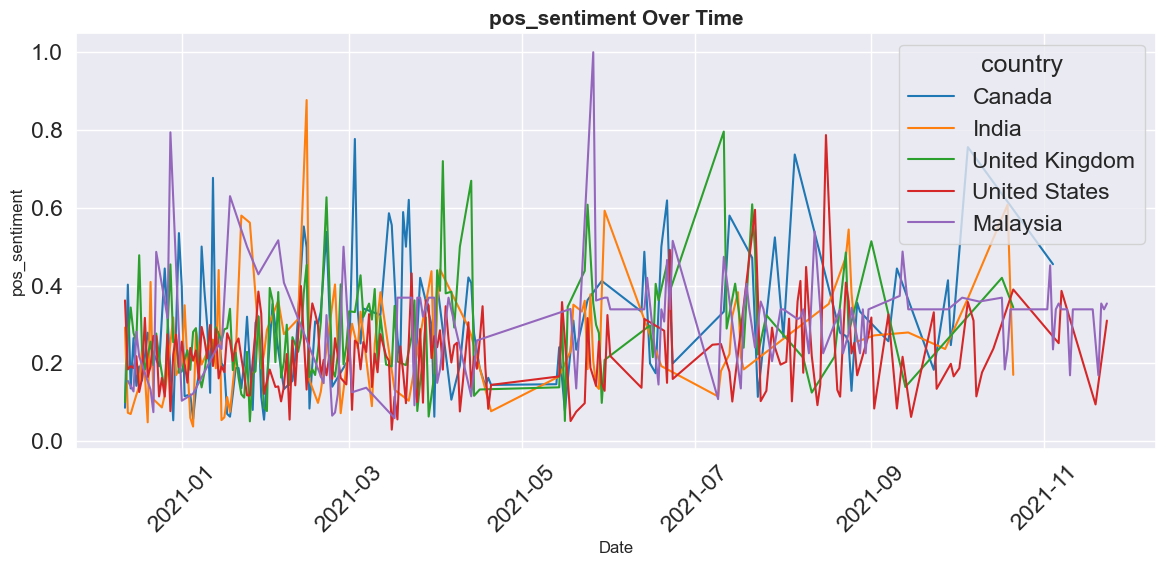

In [202]:
df = merged_df.copy()
df = df.groupby(["date","country"]).mean().reset_index()
top_10_countries =  merged_df['country'].value_counts(sort=False).nlargest(5)
df = df[(df['country'].isin(top_10_countries.index))&(df['pos_sentiment']>0)]

# maybe group by week is better

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='pos_sentiment', data=df, hue='country')
plt.xlabel('Date', fontsize=12)
plt.ylabel('pos_sentiment', fontsize=12)
plt.title('pos_sentiment Over Time', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.2 COVID-19 Global

In [193]:
# !pip install plotly-express
import plotly.express as px
fig = px.choropleth(df,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Median Sales Price ($)',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

## 5. Sentiment Analysis

## 6. Correlation Analysis

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction

### Introduction